<a href="https://colab.research.google.com/github/JuanCamilo18/Exploracion_AD/blob/main/S03_Exploracion_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando datos con Python - datos del mundo real**

En el último cuaderno, observamos las calificaciones de los datos de nuestros estudiantes e investigamos los datos visualmente con histogramas y diagramas de caja. Ahora veremos casos más complejos, describiremos los datos con más detalle y discutiremos cómo hacer comparaciones básicas entre datos.

### **Distribuciones de datos del mundo real**

Anteriormente, observamos las calificaciones de los datos de nuestros estudiantes y estimamos a partir de esta muestra cómo sería la población total de calificaciones. Refresquemos nuestra memoria y echemos un vistazo a estos datos nuevamente.

Ejecute el siguiente código para imprimir los datos y hacer un histograma + diagrama de caja que muestre las calificaciones de nuestra muestra de estudiantes.

--2023-03-14 04:52:54--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv’

grades.csv          100%[===================>]     322  --.-KB/s    in 0s      

2023-03-14 04:52:54 (3.42 MB/s) - ‘grades.csv’ saved [322/322]

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   

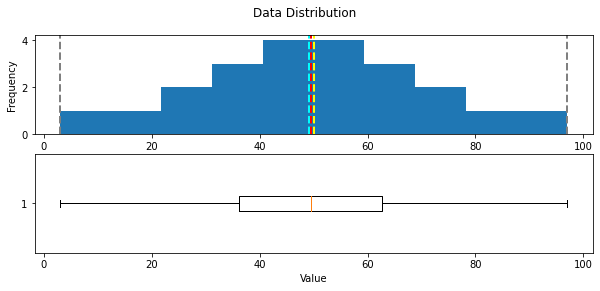

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# Load data from a text file
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(df_students['Grade'] >= 60)

# Save who passed to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)


# Print the result out into this notebook
print(df_students)


# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df_students['Grade'])

Como recordará, nuestros datos tenían la media y la moda en el centro, con datos distribuidos simétricamente desde allí.

Ahora echemos un vistazo a la distribución de los datos de horas de estudio.

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



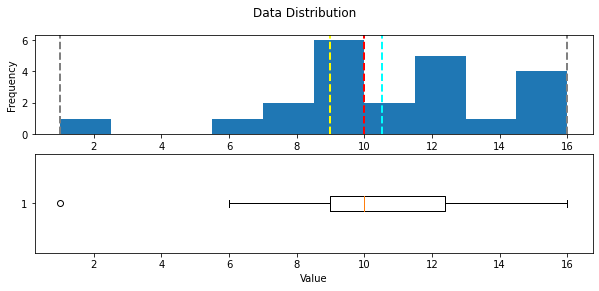

In [2]:
# Get the variable to examine
col = df_students['StudyHours']
# Call the function
show_distribution(col)

La distribución de los datos de tiempo de estudio es significativamente diferente a la de las calificaciones.

Tenga en cuenta que los bigotes del diagrama de caja solo comienzan alrededor de 6,0, lo que indica que la gran mayoría del primer trimestre de los datos está por encima de este valor. El mínimo está marcado con una o , lo que indica que estadísticamente es un valor atípico , un valor que se encuentra significativamente fuera del rango del resto de la distribución.

Los valores atípicos pueden ocurrir por muchas razones. Tal vez un estudiante pretendía registrar "10" horas de tiempo de estudio, pero ingresó "1" y se perdió el "0". ¡O tal vez el estudiante era anormalmente perezoso cuando se trataba de estudiar! De cualquier manera, es una anomalía estadística que no representa a un estudiante típico. Veamos cómo se ve la distribución sin él.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



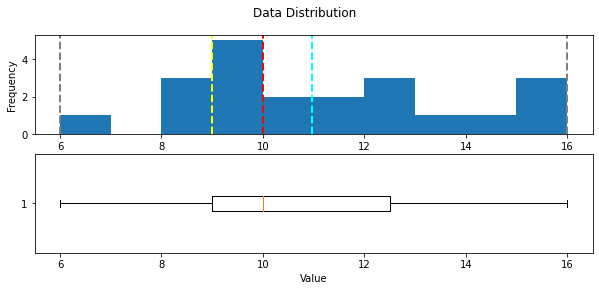

In [3]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

Con fines de aprendizaje, acabamos de tratar el valor 1 como un verdadero valor atípico aquí y lo excluimos. En el mundo real, sería inusual excluir datos en los extremos sin más justificación cuando el tamaño de nuestra muestra es tan pequeño. Esto se debe a que cuanto menor sea el tamaño de nuestra muestra, más probable es que nuestra muestra sea una mala representación de toda la población. (Aquí, la población se refiere a las calificaciones de todos los estudiantes, no solo de nuestros 22). Por ejemplo, si muestreamos el tiempo de estudio de otros 1000 estudiantes, ¡podríamos encontrar que en realidad es bastante común no estudiar mucho!

Cuando tenemos más datos disponibles, nuestra muestra se vuelve más confiable. Esto hace que sea más fácil considerar valores atípicos como valores que caen por debajo o por encima de los percentiles dentro de los cuales se encuentran la mayoría de los datos. Por ejemplo, el siguiente código utiliza la función cuantil de Pandas para excluir las observaciones por debajo del percentil 0,01 (el valor por encima del cual reside el 99 % de los datos).

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



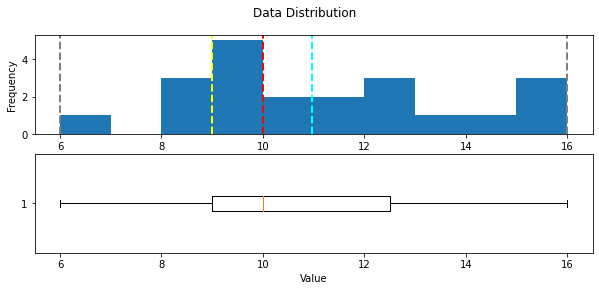

In [4]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']
# Call the function
show_distribution(col)

Sugerencia : también puede eliminar los valores atípicos en el extremo superior de la distribución definiendo un umbral en un valor de percentil alto. Por ejemplo, podría usar la función cuantil para encontrar el percentil 0,99 por debajo del cual reside el 99 % de los datos.

Con los valores atípicos eliminados, el diagrama de caja muestra todos los datos dentro de los cuatro cuartiles. Tenga en cuenta que la distribución no es simétrica como lo es para los datos de grado. Hay algunos alumnos con tiempos de estudio muy elevados, en torno a las 16 horas, pero el grueso de los datos se sitúa entre las 7 y las 13 horas. Los pocos valores extremadamente altos tiran de la media hacia el extremo superior de la escala.

Veamos la densidad de esta distribución.

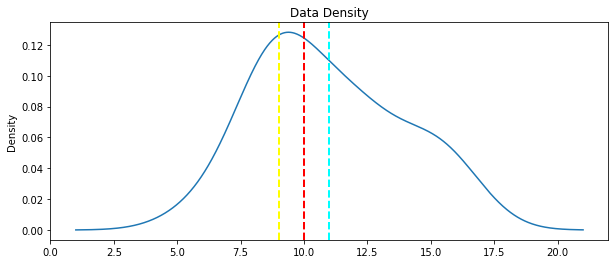

In [5]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(col)


Este tipo de distribución se llama asimétrica a la derecha . La masa de los datos está en el lado izquierdo de la distribución, creando una larga cola hacia la derecha debido a los valores en el extremo superior, que tiran de la media hacia la derecha.

#### **Medidas de varianza**

Así que ahora tenemos una buena idea de dónde está la mitad de las distribuciones de datos de calificaciones y horas de estudio. Sin embargo, hay otro aspecto de las distribuciones que debemos examinar: ¿cuánta variabilidad hay en los datos?

Las estadísticas típicas que miden la variabilidad en los datos incluyen:

- **Rango :** La diferencia entre el máximo y el mínimo. No hay una función integrada para esto, pero es fácil de calcular usando las funciones min y max .
- **Varianza :** El promedio de la diferencia al cuadrado de la media. Puede usar la función var incorporada para encontrar esto.
- **Desviación estándar :** La raíz cuadrada de la varianza. Puede usar la función estándar incorporada para encontrar esto.

De estas estadísticas, la desviación estándar es generalmente la más útil. Proporciona una medida de la varianza de los datos en la misma escala que los datos mismos (por lo tanto, puntos de calificación para la distribución de calificaciones y horas para la distribución de horas de estudio). Cuanto mayor sea la desviación estándar, mayor será la variación al comparar los valores de la distribución con la media de la distribución ; en otras palabras, los datos estarán más dispersos.

Cuando se trabaja con una distribución normal , la desviación estándar funciona con las características particulares de una distribución normal para brindar una visión aún mayor. Ejecute la celda a continuación para ver la relación entre las desviaciones estándar y los datos en la distribución normal.


Las líneas horizontales muestran el porcentaje de datos dentro de 1, 2 y 3 desviaciones estándar de la media (más o menos).

En cualquier distribución normal:

- Aproximadamente el 68,26% de los valores se encuentran dentro de una desviación estándar de la media.
- Aproximadamente el 95,45% de los valores se encuentran dentro de dos desviaciones estándar de la media.
- Aproximadamente el 99,73% de los valores se encuentran dentro de las tres desviaciones estándar de la media.

Entonces, como sabemos que la calificación media es 49,18, la desviación estándar es 21,74 y la distribución de calificaciones es aproximadamente normal, podemos calcular que el 68,26 % de los estudiantes deben obtener una calificación entre 27,44 y 70,92.

Las estadísticas descriptivas que hemos usado para comprender la distribución de las variables de datos de los estudiantes son la base del análisis estadístico. Debido a que son una parte tan importante de la exploración de sus datos, existe un método integrado describedel objeto DataFrame que devuelve las estadísticas descriptivas principales para todas las columnas numéricas.


### **Comparando datos**

Ahora que sabe algo sobre la distribución estadística de los datos en su conjunto de datos, está listo para examinar sus datos para identificar cualquier relación aparente entre las variables.

En primer lugar, deshagámonos de las filas que contengan valores atípicos para que tengamos una muestra que sea representativa de una clase típica de estudiantes. Identificamos que la columna StudyHours contiene algunos valores atípicos con valores extremadamente bajos, por lo que eliminaremos esas filas.

#### **Comparación de variables numéricas y categóricas**

Los datos incluyen dos variables numéricas ( **StudyHours y Grade** ) y dos variables categóricas ( **Name y Pass** ). Comencemos comparando la columna numérica **StudyHours** con la columna categórica **Aprobado** para ver si existe una relación aparente entre la cantidad de horas estudiadas y la calificación aprobatoria.

Para hacer esta comparación, creemos diagramas de caja que muestren la distribución de las Horas de estudio para cada posible valor de Aprobado (verdadero y falso).

Al comparar las distribuciones de StudyHours, es inmediatamente evidente (si no particularmente sorprendente) que los estudiantes que aprobaron el curso tendieron a estudiar durante más horas que los estudiantes que no lo hicieron. Entonces, si desea predecir si es probable que un estudiante apruebe el curso o no, la cantidad de tiempo que dedica a estudiar puede ser un buen indicador predictivo.

Comparar variables numéricas
Ahora comparemos dos variables numéricas. Comenzaremos creando un gráfico de barras que muestre tanto la calificación como las horas de estudio.


El gráfico muestra barras tanto para el grado como para las horas de estudio de cada estudiante, pero no es fácil de comparar porque los valores están en diferentes escalas. Una calificación se mide en puntos de calificación (y varía de 3 a 97), y el tiempo de estudio se mide en horas (y varía de 1 a 16).

Una técnica común cuando se trata de datos numéricos en diferentes escalas es normalizar los datos para que los valores conserven su distribución proporcional pero se midan en la misma escala. Para lograr esto, usaremos una técnica llamada escalado MinMax que distribuye los valores proporcionalmente en una escala de 0 a 1. Puede escribir el código para aplicar esta transformación, pero la biblioteca **Scikit-Learn** proporciona un escalador para hacerlo por usted. .

Con los datos normalizados, es más fácil ver una relación aparente entre la calificación y el tiempo de estudio. No es una coincidencia exacta, pero definitivamente parece que los estudiantes con calificaciones más altas tienden a haber estudiado más.

Así que parece haber una correlación entre el tiempo de estudio y el grado. De hecho, hay una medida de correlación estadística que podemos usar para cuantificar la relación entre estas columnas.

La estadística de correlación es un valor entre -1 y 1 que indica la fuerza de una relación. Valores por encima de 0 indican una correlación positiva (valores altos de una variable tienden a coincidir con valores altos de la otra), mientras que valores por debajo de 0 indican una correlación negativa (valores altos de una variable tienden a coincidir con valores bajos de la otra). En este caso, el valor de correlación es cercano a 1, mostrando una correlación fuertemente positiva entre el tiempo de estudio y el grado.

**Nota :** Los científicos de datos suelen citar la máxima " la correlación no es causalidad ". En otras palabras, por muy tentador que sea, no debe interpretar la correlación estadística como una explicación de por qué uno de los valores es alto. En el caso de los datos de los estudiantes, las estadísticas demuestran que los estudiantes con notas altas tienden a tener también una gran cantidad de tiempo de estudio, pero esto no es lo mismo que demostrar que obtuvieron notas altas porque estudiaron mucho. La estadística también podría usarse como evidencia para respaldar la conclusión sin sentido de que los estudiantes estudiaron mucho porque sus calificaciones iban a ser altas.

Otra forma de visualizar la correlación aparente entre dos columnas numéricas es usar un diagrama de dispersión .

Una vez más, parece que hay un patrón perceptible en el que los estudiantes que estudiaron la mayor cantidad de horas son también los estudiantes que obtuvieron las calificaciones más altas.

Podemos ver esto más claramente agregando una línea de regresión (o una línea de mejor ajuste ) a la gráfica que muestra la tendencia general en los datos. Para hacer esto, usaremos una técnica estadística llamada regresión de mínimos cuadrados .

Recuerda cuando estabas aprendiendo a resolver ecuaciones lineales en la escuela y recuerda que la forma pendiente-intersección de una ecuación lineal se ve así:

$y = metro X + b$
 

En esta ecuación, y y x son las variables de coordenadas, m es la pendiente de la línea y b es la intersección y (donde la línea pasa por el eje Y).

En el caso de nuestro diagrama de dispersión para los datos de nuestros estudiantes, ya tenemos nuestros valores para x ( Horario de estudio ) e y ( Calificación ), por lo que solo necesitamos calcular la intersección y la pendiente de la línea recta más cercana a esos puntos. Luego podemos formar una ecuación lineal que calcule un nuevo valor de y en esa línea para cada uno de nuestros valores de x ( Horas de estudio ). Para evitar confusiones, llamaremos a este nuevo valor de y f(x) (porque es el resultado de una función de ecuación lineal basada en x ). La diferencia entre el y original ( Grado) y el valor de f(x) es el error entre nuestra línea de regresión y la calificación real obtenida por el estudiante. Nuestro objetivo es calcular la pendiente y la intersección de una línea con el error general más bajo.

Específicamente, definimos el error general tomando el error de cada punto, elevándolo al cuadrado y sumando todos los errores al cuadrado. La línea de mejor ajuste es la línea que nos da el valor más bajo para la suma de los errores cuadráticos , de ahí el nombre de regresión de mínimos cuadrados .

Afortunadamente, no necesita codificar el cálculo de regresión usted mismo. El paquete SciPy incluye una clase de estadísticas que proporciona un método linregress para hacer el trabajo duro por usted. Esto devuelve (entre otras cosas) los coeficientes que necesita para la ecuación de la pendiente: pendiente ( m ) e intercepción ( b ) en función de un par dado de muestras variables que desea comparar.


Tenga en cuenta que esta vez, el código trazó dos cosas distintas : el gráfico de dispersión de las horas de estudio de muestra y las calificaciones se traza como antes, y luego se traza una línea de mejor ajuste basada en los coeficientes de regresión de mínimos cuadrados.

Los coeficientes de pendiente e intersección calculados para la línea de regresión se muestran arriba del gráfico.

La línea se basa en los valores f (x) calculados para cada valor de StudyHours . Ejecute la siguiente celda para ver una tabla que incluye los siguientes valores:

- Las horas de estudio de cada alumno.
- La Nota obtenida por cada estudiante.
- El valor de f(x) calculado utilizando los coeficientes de la línea de regresión.
- El error entre el valor calculado de f(x) y el valor real de Grado .

Algunos de los errores, particularmente en los extremos, y bastante grandes (hasta más de 17,5 puntos de calificación). Pero, en general, la línea está bastante cerca de las calificaciones reales.


### **Uso de los coeficientes de regresión para la predicción**

Ahora que tiene los coeficientes de regresión para la relación entre el tiempo de estudio y la calificación, puede usarlos en una función para estimar la calificación esperada para una determinada cantidad de estudio.

Entonces, al aplicar estadísticas a datos de muestra, ha determinado una relación entre el tiempo de estudio y la calificación y encapsulado esa relación en una función general que se puede usar para predecir una calificación para una cantidad determinada de tiempo de estudio.

Esta técnica es, de hecho, la premisa básica del aprendizaje automático. Puede tomar un conjunto de datos de muestra que incluye una o más características (en este caso, la cantidad de horas estudiadas) y un valor de etiqueta conocido (en este caso, la calificación obtenida) y usar los datos de muestra para derivar una función que calcula valores de etiqueta predichos para cualquier conjunto dado de características.

**Resumen**

Aquí hemos mirado:

Qué es un valor atípico y cómo eliminarlo
Cómo se pueden sesgar los datos
Cómo observar la dispersión de datos
Maneras básicas de comparar variables, como calificaciones y tiempo de estudio
Otras lecturas
Para obtener más información sobre los paquetes de Python que exploró en este cuaderno, consulte la siguiente documentación:

NumPy
pandas
matplotlib